# Unconstrained Population Growth #

## Initialization ##
This section contains initialization code which gives this notebook the resources it needs to run

In [1]:
#This code performs the necessary steps to prepare to plot.
from pylab import *     #Import plotting module matplotlib as well as other modules
                        #into the global namespace.

#Set the default plot to be inline rather than a new window.
%matplotlib inline

import inspect  #This allows us to print the source code in this notebook.
from UnconstrainedGrowth import *  #Import the custom functions from this project.

goldenratio=1/2*(1+sqrt(5))        #The next few lines are used for the size of plots
fsx=7                              #Width (in inches) for the figures.
fsy=fsx/goldenratio                #Height (in inches) for the figures.

## Unconstrained Growth Problem
The problem is simulated in the python module titled "Chapter 2" which is in the same folder as this notebook.

The function growth takes a time step size, dt, and returns a tuple with the time and population at one second intervals.  It solves the differntial equation with an initial population of 100 and a growth rate of 0.1.  The source code for growth is below.

In [2]:
print(inspect.getsource(grow))

def grow(dt):
    """Calculates the population vs time for given parameters."""

    rate = 0.1
    p0 = 100
    SimulationLength = 100

    population = p0
    t = 0
    t_array = [0]
    population_array = [p0]

    rdt = rate*dt
    while t < SimulationLength:
        population += rdt * population
        t += dt
        if abs(t - round(t, 0)) < dt / 2:
            t_array.append(t)
            population_array.append(population)
    return t_array, population_array



In [3]:
dt = 0.005
dta = dt
ta, pa = grow(dt)

<p>In the code below:<ul>
<li><a href = "http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure">figure</a> -> creates a figure instance.  The figsize specifies the figure size in inches.</li>
<li><a href = "http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">plot</a> -> creates a data series in the figure.  The options specify the style of the plot as explained in the <a href = "http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">plot documentation<a>.</li>
<li><a href=http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_markerfacecolor>MFC</a> -> sets the marker face color.  The four element tuple is the (red, green, blue, alpha).  The alpha value sets the transparency, with 0 being transparent.  The matplotlib documentation has a good introduction to <a href=http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties>controlling line properties</a>.</li>
<li>mec -> sets the marker edge color.  See the <a href = "http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">plot documentation</a> for a list of the supported color abbreviations.</li></ul>

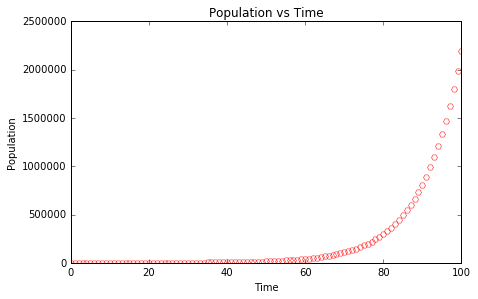

In [4]:
figure(figsize=(fsx, fsy))
plot(ta, pa, 'H', MFC=(1, 0, 0, 0),mec='r')
xlabel('Time')
ylabel('Population')
title('Population vs Time')
show()

<h2>Different $\Delta t$ Values</h2>
<p>The solution above seems to be a good solution.  One question we might as is 'what is the effect of the time step size,$\Delta t$.  We will now run the same simulation, but we will use successively larger values for $\Delta t$.</p>

<h3>$\Delta t = 0.01$</h3>

In [5]:
dt = 0.01
dtb = dt
tb, pb = grow(dt)

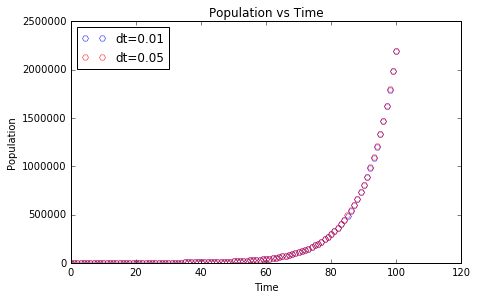

In [6]:
figure(figsize=(fsx, fsy))
plot(tb, pb, 'H', MFC=(1,0,0,0),mec='b', label = "dt=0.01")
plot(ta, pa, 'H', MFC=(1,0,0,0),mec='r', label = "dt=0.05")
xlabel('Time')
ylabel('Population')
title('Population vs Time')
legend(loc=2)
show()

<p>These two values are practically indistinguishable from each other.  This indicates that smaller $\Delta t$ yields an acceptable error (technically discretization error) for this problem.</p>

<h3>$\Delta t = 0.1, 0.5, 1$</h3>

In [7]:
dtb=0.1
dtc=0.5
dtd=1.0
tb, pb = grow(dtb)
tc, pc = grow(dtc)
td, pd = grow(dtd)

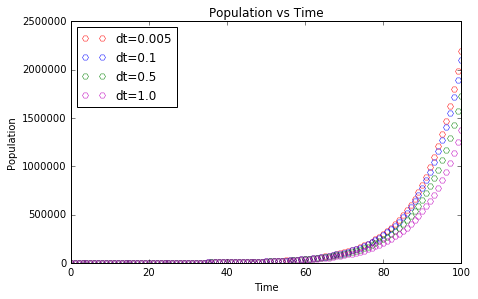

In [8]:
figure(figsize=(fsx, fsy))
plot(ta, pa, 'H', MFC=(1,0,0,0),mec='r', label = "dt="+str(dta))
plot(tb, pb, 'H', MFC=(1,0,0,0),mec='b', label = "dt="+str(dtb))
plot(tc, pc, 'H', MFC=(1,0,0,0),mec='g', label = "dt="+str(dtc))
plot(td, pd, 'H', MFC=(1,0,0,0),mec='m', label = "dt="+str(dtd))
xlabel('Time')
ylabel('Population')
title('Population vs Time')
legend(loc=2)
show()

<h3>Analysis of Error associated with $\Delta t$</h3>
<p>First, let us zoom in on the late stage of this graph where in is obvious that there is some error for the simulations with a larger $\Delta t$.  We will also include the exact analytic solution on this graph.</p>
<p>In the statement below, we define a function for the exact result, and then use that function to populate the p_exact list with the exact values.</p>

In [9]:
def p(t):
    return 100* exp(0.1 * t)
t_exact = [t for t in range(101)]
p_exact = [p(t) for t in range(101)]

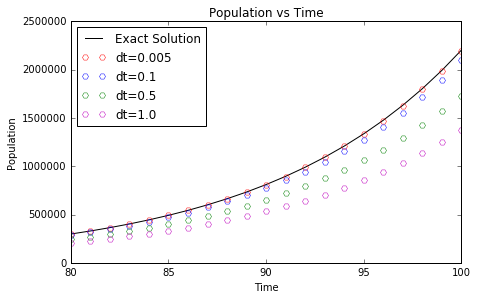

In [10]:
figure(figsize=(fsx, fsy))
plot(t_exact, p_exact, 'k-', label='Exact Solution')
plot(ta, pa, 'H', MFC=(1,0,0,0),mec='r', label = "dt="+str(dta))
plot(tb, pb, 'H', MFC=(1,0,0,0),mec='b', label = "dt="+str(dtb))
plot(tc, pc, 'H', MFC=(1,0,0,0),mec='g', label = "dt="+str(dtc))
plot(td, pd, 'H', MFC=(1,0,0,0),mec='m', label = "dt="+str(dtd))
axis([80, 100, 000, 2500000])
xlabel('Time')
ylabel('Population')
title('Population vs Time')
legend(loc=2)
show()

We see that for the range of the graph, the $\Delta t=0.005$ simulation gives fairly accuract results.  The $\Delta t=0.1$ simulation even gives decent values.  The simulations with larger step size show a large error over the time for this simulation.  The code below calculates the absolute error for each $\Delta t$ value.  It uses [List Comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) to generate the error data by subtracting the simulated value from the exact value at each time step.

In [11]:
errora = [p(ta[i]) - pa[i] for i in range(101)]
errorb = [p(ta[i]) - pb[i] for i in range(101)]
errorc = [p(ta[i]) - pc[i] for i in range(101)]
errord = [p(ta[i]) - pd[i] for i in range(101)]

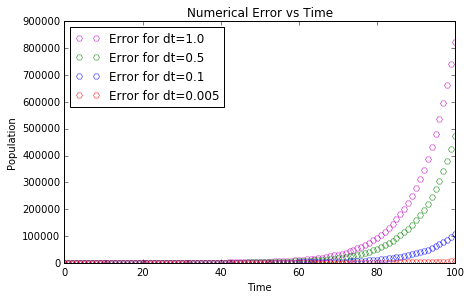

In [12]:
figure(figsize=(fsx, fsy))
plot(td, errord, 'H', MFC=(1,0,0,0),mec='m', label = "Error for dt="+str(dtd))
plot(tc, errorc, 'H', MFC=(1,0,0,0),mec='g', label = "Error for dt="+str(dtc))
plot(tb, errorb, 'H', MFC=(1,0,0,0),mec='b', label = "Error for dt="+str(dtb))
plot(ta, errora, 'H', MFC=(1,0,0,0),mec='r', label = "Error for dt="+str(dta))
#axis([80, 100, 000, 2500000])
xlabel('Time')
ylabel('Population')
title('Numerical Error vs Time')
legend(loc=2)
show()

## Conclusion
We have used finite difference methods to simulate population growth modeled by $\frac{dP}{dt}=rP$.  We wrote a python function which performs the simulation in a module file.  In this notebook, we imported that module file and used it to generate the data.  We then used [Matplotlib](http://matplotlib.org/) to plot the simulation results and begin exploring the simulation error.  We will return to these error considerations later in chapter five and six.